In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = 'C:/Users/Anna/Downloads/loansdata/LoansData.csv'
df = pd.read_csv(path)
df.head()

C:\Users\Anna\AppData\Local\Temp\ipykernel_2668\1256901251.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['application_type'].value_counts(normalize=True)*100

application_type
INDIVIDUAL    99.942415
JOINT          0.057585
Name: proportion, dtype: float64

In [27]:
valid_aplication_type = df['application_type'].value_counts(normalize=True)
valid_aplication_type = valid_aplication_type[valid_aplication_type>=0.05].index
df_filtered = df[df['application_type'].isin(valid_aplication_type)].copy()
df_filtered['application_type'].value_counts(normalize=True)*100

application_type
INDIVIDUAL    100.0
Name: proportion, dtype: float64

In [49]:
fields = ['grade', 'home_ownership', 'verification_status', 'pymnt_plan']
for field in fields:
    print(f"field '{field}':")
    unique_count = df_filtered[field].nunique()
    total = len(df_filtered[field])
    unique_percentage = (unique_count / total) * 100
    print(f"counts = {unique_count}\npercentage = {unique_percentage:.6f}")

field 'grade':
counts = 7
percentage = 0.000789
field 'home_ownership':
counts = 6
percentage = 0.000677
field 'verification_status':
counts = 3
percentage = 0.000338
field 'pymnt_plan':
counts = 2
percentage = 0.000226


In [59]:
columns_to_drop = []

for col in df_filtered.columns:
    total_count = len(df_filtered[col])
    unique_count = df_filtered[col].nunique()
    null_count = df_filtered[col].isnull().sum()
    
    value_counts = df_filtered[col].value_counts(normalize=True) * 100
    top_value_percentage = value_counts.iloc[0] if len(value_counts) > 0 else 0
    top_value = value_counts.index[0] if len(value_counts) > 0 else None
    
    condition1 = unique_count < 10 
    condition2 = top_value_percentage > 80
    
    should_drop = condition1 and condition2
    if should_drop:
        columns_to_drop.append(col)

df_cleaned = df_filtered.drop(columns_to_drop, axis=1)

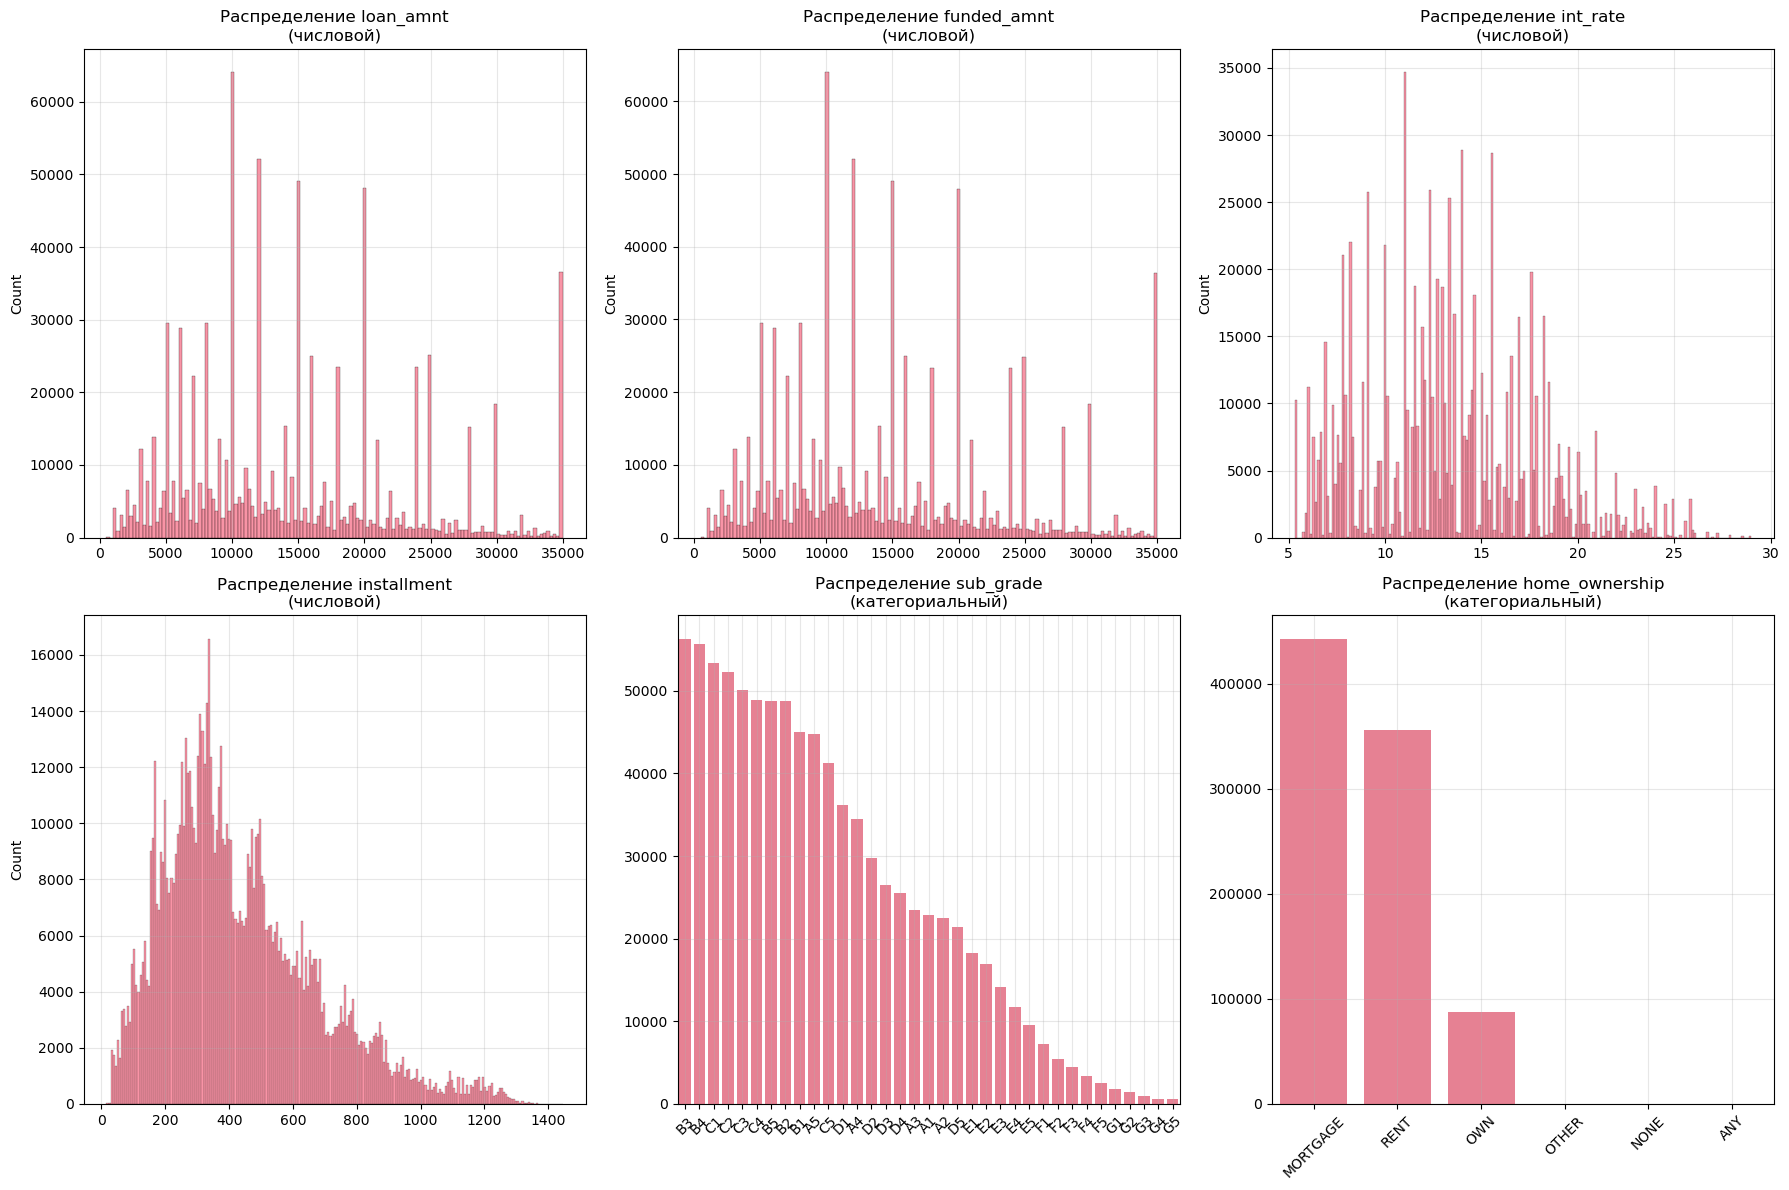

In [117]:
plt.style.use('default')
sns.set_palette("husl")

columns = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'sub_grade', 'home_ownership']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, column in enumerate(columns):
    if df_cleaned[column].dtype in ['float64', 'int64']:
        sns.histplot(data=df_cleaned, x=column, ax=axes[i])
        axes[i].set_title(f'Распределение {column}\n(числовой)')
    else:
        value_counts = df_cleaned[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
        axes[i].set_title(f'Распределение {column}\n(категориальный)')
        axes[i].tick_params(axis='x', rotation=45)
    
    axes[i].set_xlabel('')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [75]:
df_cleaned['loan_amnt'].describe()

count    886868.000000
mean      14752.593452
std        8434.363707
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [77]:
quantiles = df_cleaned['loan_amnt'].quantile([0.01, 0.05, 0.95, 0.99])

for q, value in quantiles.items():
    print(f"{q*100:.0f}% квантиль: {value:.2f}")

1% квантиль: 1800.00
5% квантиль: 3600.00
95% квантиль: 32000.00
99% квантиль: 35000.00


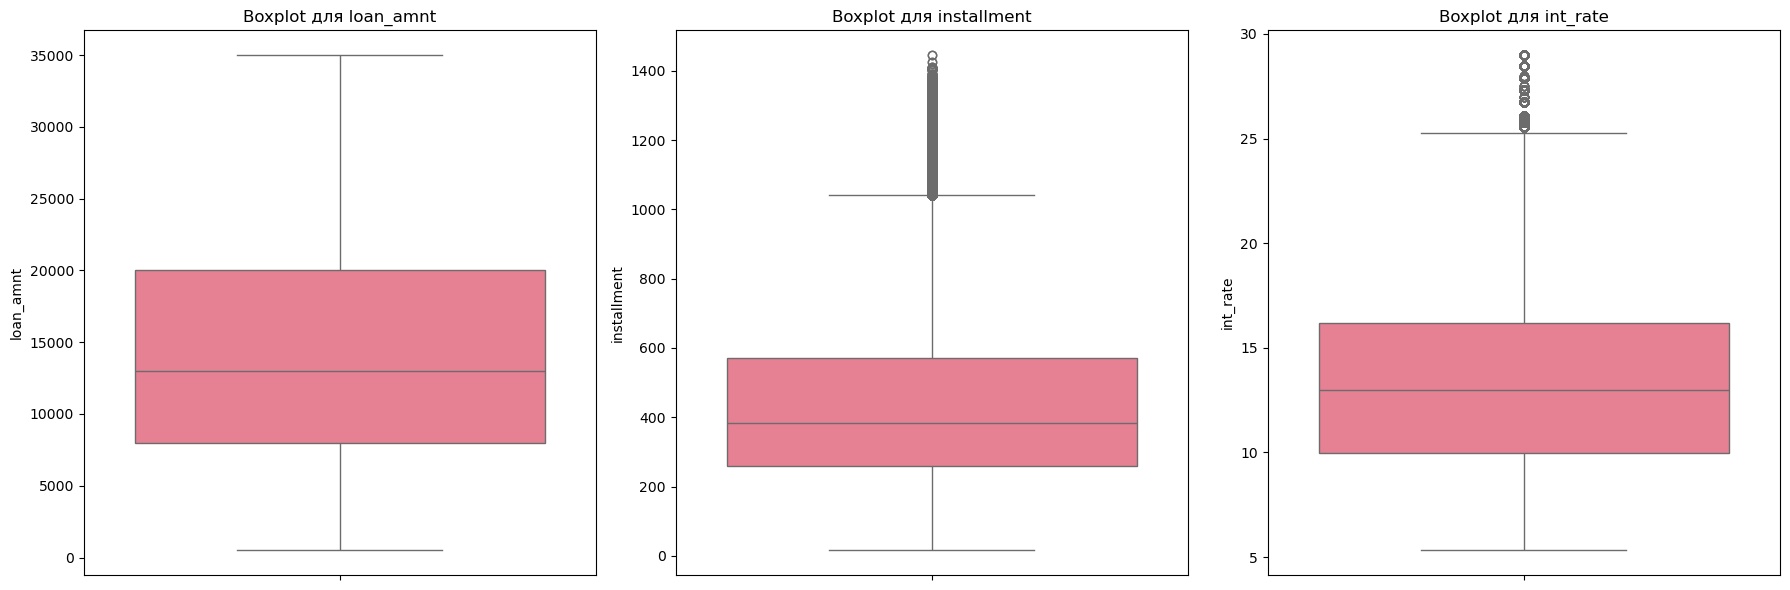

In [107]:
columns = ['loan_amnt', 'installment', 'int_rate']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, column in enumerate(columns):
    sns.boxplot(data=df_cleaned, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot для {column}')
    axes[i].set_ylabel(column)
    
plt.tight_layout()
plt.show()

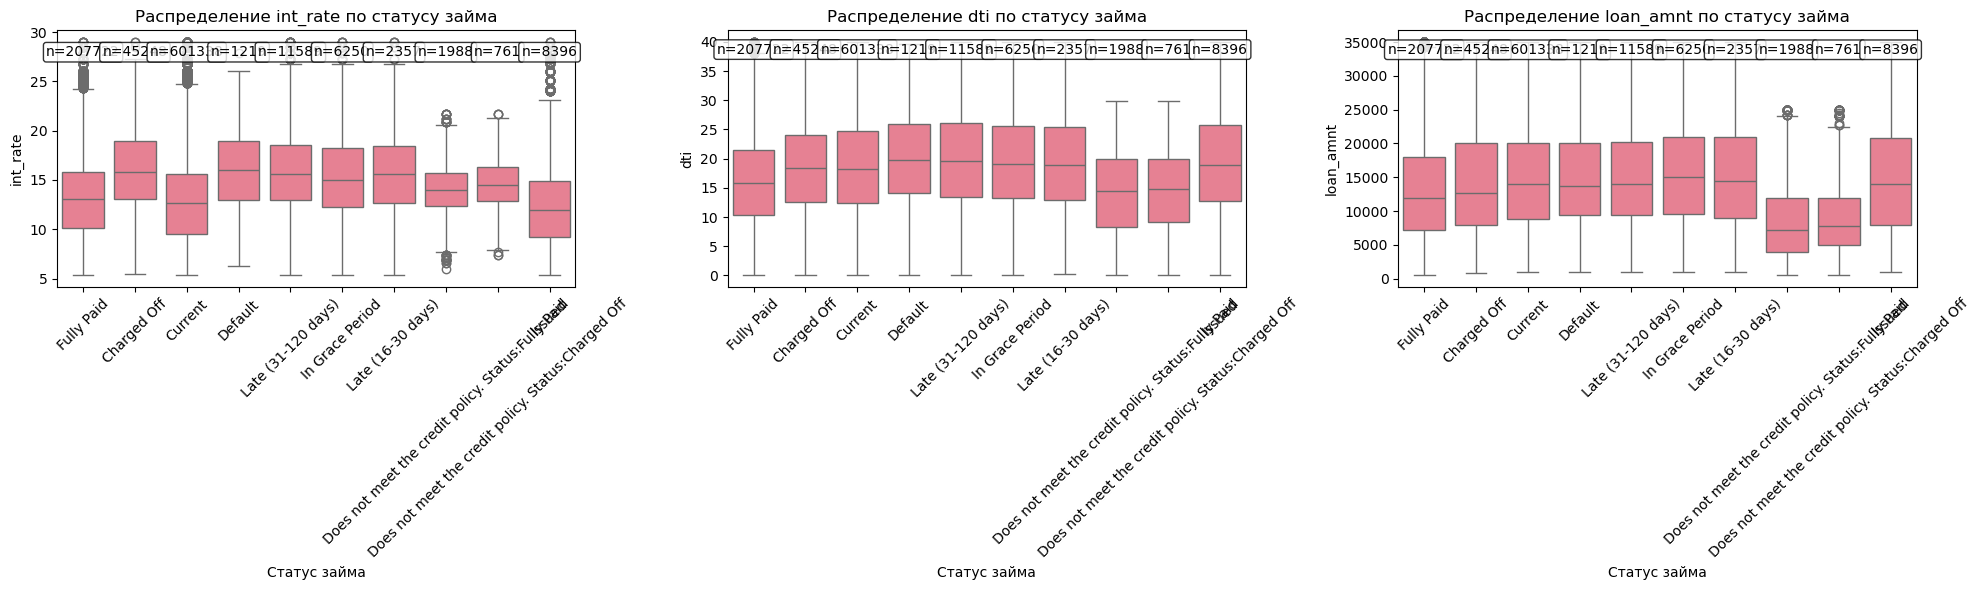

In [109]:
columns = ['int_rate', 'dti', 'loan_amnt']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, column in enumerate(columns):
    sns.boxplot(data=df_cleaned, x='loan_status', y=column, ax=axes[i])
    axes[i].set_title(f'Распределение {column} по статусу займа')
    axes[i].set_xlabel('Статус займа')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=45)

    status_counts = df_cleaned['loan_status'].value_counts()
    for j, status in enumerate(df_cleaned['loan_status'].unique()):
        count = status_counts.get(status, 0)
        axes[i].text(j, axes[i].get_ylim()[1] * 0.95, f'n={count}', 
                    ha='center', va='top',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

Статистика дохода по статусам займа:
                                         loan_status      mean   median  \
7                                             Issued  78402.08  67000.0   
1                                            Current  76166.38  65000.0   
6                                    In Grace Period  76147.61  64000.0   
5                                         Fully Paid  74162.06  64169.0   
8                                  Late (16-30 days)  73279.12  62000.0   
4  Does not meet the credit policy. Status:Fully ...  72145.42  57000.0   
9                                 Late (31-120 days)  70023.21  60000.0   
3  Does not meet the credit policy. Status:Charge...  69525.92  54000.0   
2                                            Default  66754.13  56000.0   
0                                        Charged Off  65085.13  56000.0   

    count        std  
7    8396   66068.45  
1  601338   66430.20  
6    6250  125490.72  
5  207722   59080.63  
8    2357   45624.10  

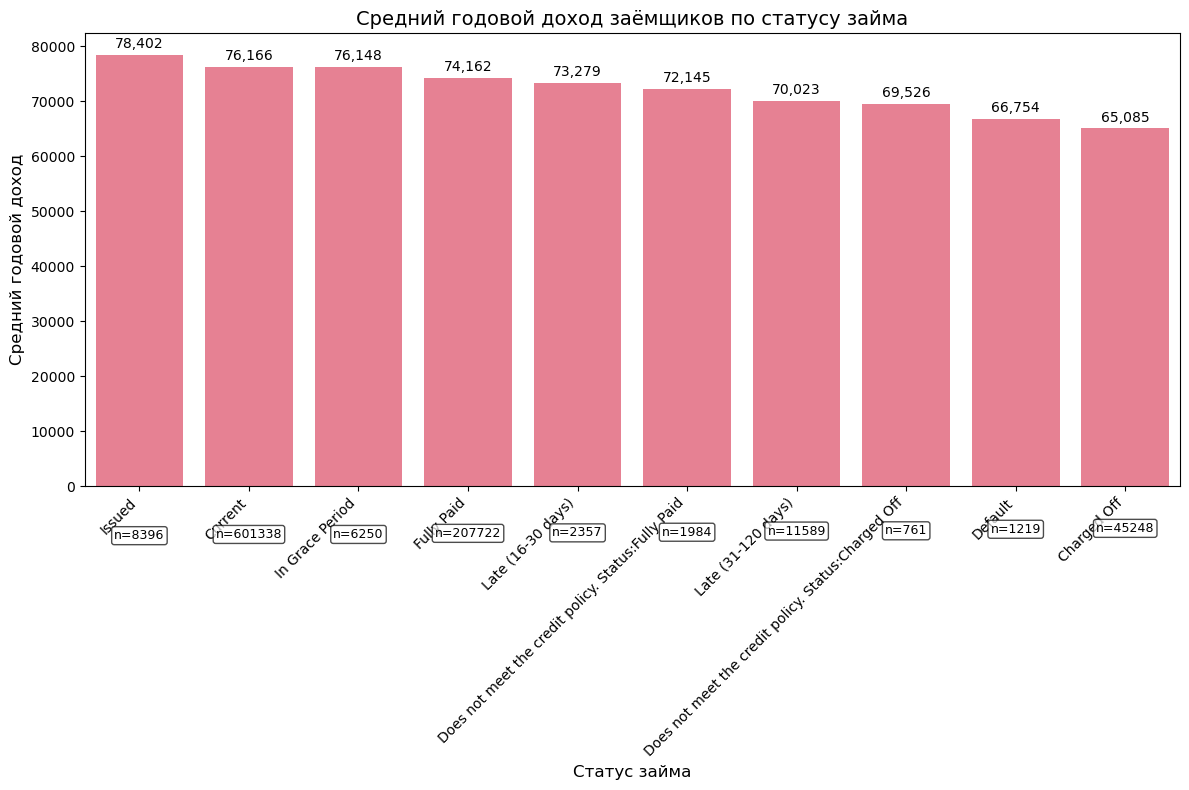

In [125]:

income_by_status = df_cleaned.groupby('loan_status')['annual_inc'].agg(['mean', 'median', 'count', 'std']).reset_index()
income_by_status = income_by_status.sort_values('mean', ascending=False)

print("Статистика дохода по статусам займа:")
print(income_by_status.round(2))

plt.figure(figsize=(12, 8))
bars = sns.barplot(data=income_by_status, x='loan_status', y='mean', 
                   order=income_by_status['loan_status'])

plt.title('Средний годовой доход заёмщиков по статусу займа', fontsize=14)
plt.xlabel('Статус займа', fontsize=12)
plt.ylabel('Средний годовой доход', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, (idx, row) in enumerate(income_by_status.iterrows()):
    plt.text(i, row['mean'] + row['mean'] * 0.01, 
             f'{row["mean"]:,.0f}', 
             ha='center', va='bottom')

for i, (idx, row) in enumerate(income_by_status.iterrows()):
    plt.text(i, -row['mean'] * 0.1, 
             f'n={row["count"]}', 
             ha='center', va='top', fontsize=9, 
             bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7))

plt.tight_layout()
plt.show()

             int_rate  loan_amnt  total_pymnt  total_acc
int_rate        1.000      0.145        0.171     -0.039
loan_amnt       0.145      1.000        0.475      0.223
total_pymnt     0.171      0.475        1.000      0.109
total_acc      -0.039      0.223        0.109      1.000


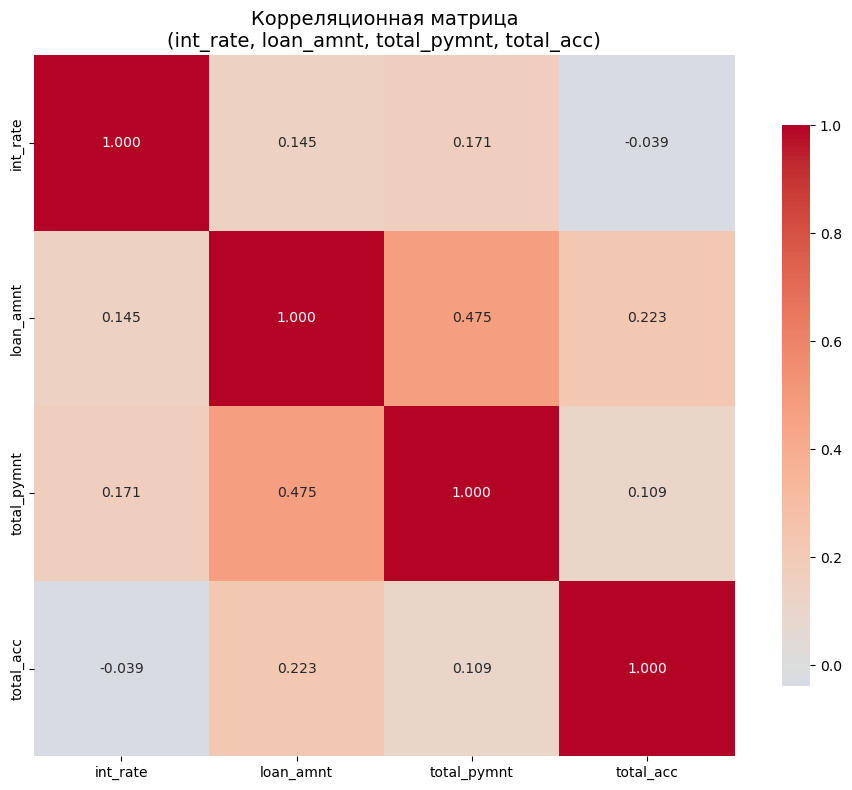

In [123]:
correlation_columns = ['int_rate', 'loan_amnt', 'total_pymnt', 'total_acc']
correlation_df = df_cleaned[correlation_columns]

correlation_df_clean = correlation_df.dropna()
correlation_matrix = correlation_df_clean.corr(method='pearson')

print(correlation_matrix.round(3))

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True, 
                      cmap='coolwarm', 
                      center=0,
                      square=True,
                      fmt='.3f',
                      cbar_kws={'shrink': 0.8})

plt.title('Корреляционная матрица\n(int_rate, loan_amnt, total_pymnt, total_acc)', 
          fontsize=14)
plt.tight_layout()
plt.show()